In [209]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


In [210]:
fashion_df = tf.keras.datasets.fashion_mnist

In [211]:
(train_images,train_labels),(test_images,test_labels) = fashion_df.load_data()

In [212]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [213]:
# Explore the Data

In [214]:
train_images.shape

(60000, 28, 28)

In [215]:
test_images.shape

(10000, 28, 28)

In [216]:
len(train_labels)

60000

In [217]:
len(test_labels)

10000

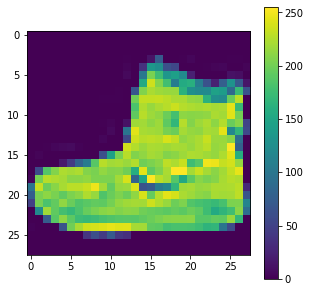

In [218]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[0])
plt.grid(False)
plt.colorbar()
plt.show()

In [219]:
train_images = train_images/255.0

test_images = test_images/255.0

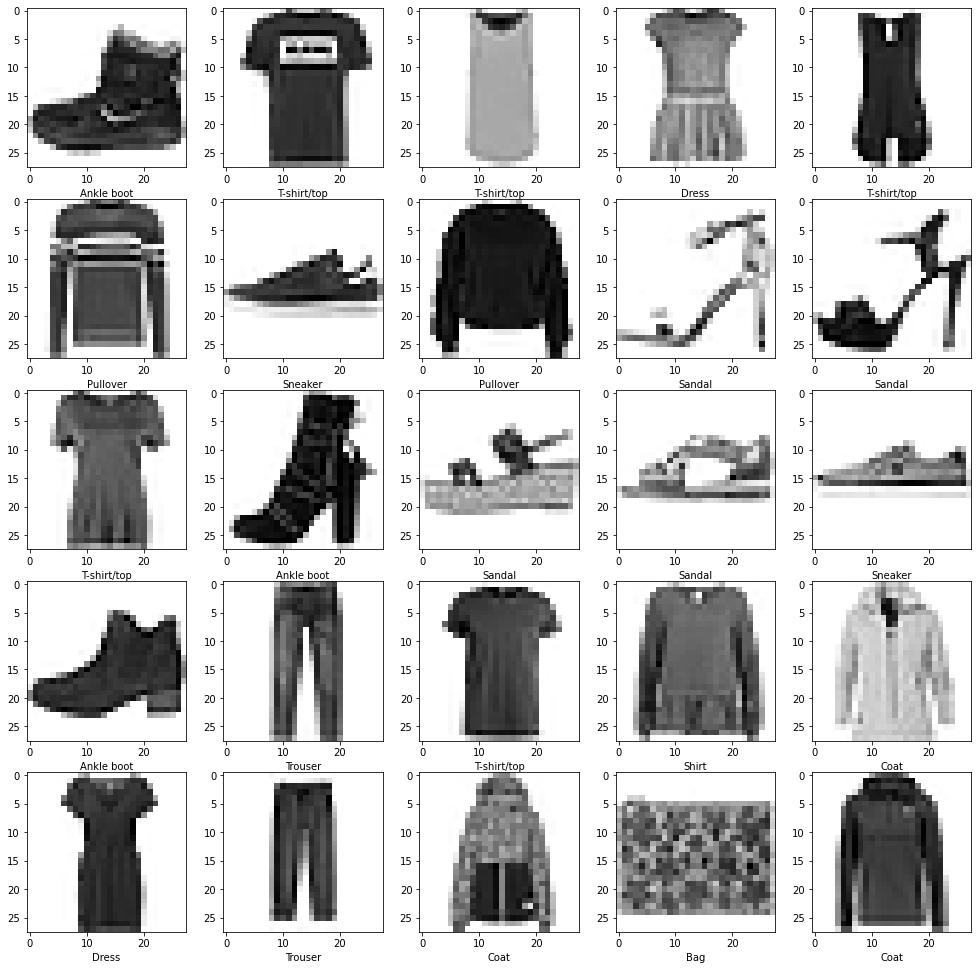

In [220]:
plt.figure(figsize = (17,17))
for i in range(25):
  plt.subplot(5,5,i+1)
  #plt.xticks()
  #plt.yticks()
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [221]:
from tensorflow.keras.layers import Flatten,Dense

model = tf.keras.Sequential([
                             Flatten(input_shape = (28,28)),
                             Dense(128,activation='relu'),
                             Dense(10)
])

In [222]:
model.compile(
      optimizer = "adam",
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
      metrics = ["accuracy"]
)

In [223]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4953 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3738 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3367 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3145 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2949 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2806 - accuracy: 0.8945
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2692 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2567 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2465 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [224]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)


313/313 - 0s - loss: 0.3457 - accuracy: 0.8802


# as we see there is a difference between accuracy of train and test data, thus it is overfitted

In [225]:
probability_model = tf.keras.Sequential([
                                        model,
                                        tf.keras.layers.Softmax()
])

In [226]:
predictions = probability_model.predict(test_images)

In [227]:
predictions[0]

array([5.7123909e-08, 1.2761254e-07, 1.1141942e-08, 1.4051520e-11,
       8.1362138e-08, 5.3572911e-03, 4.2381227e-08, 2.3239646e-02,
       2.2905265e-07, 9.7140259e-01], dtype=float32)

In [228]:
np.argmax(predictions[0])

9

In [229]:
test_labels[0]

9

In [230]:
test_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [231]:
# the predicted value and true value for testdata are same

In [232]:
def plot_image(i,predicted_array,true_label,img):
  true_label,img = true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predicted_array)

  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predicted_array),class_names[true_label]),color=color)

def plot_label(i,predicted_array,true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  
  predicted_label = np.argmax(predicted_array)

  thisplot = plt.bar(range(10),predicted_array)
  plt.ylim(0,1)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")



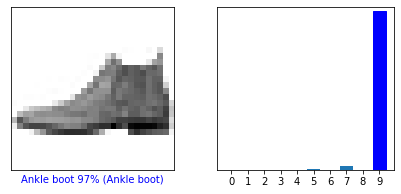

In [233]:
i = 0
plt.figure(figsize = (7,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_label(i, predictions[i], test_labels)
plt.show()

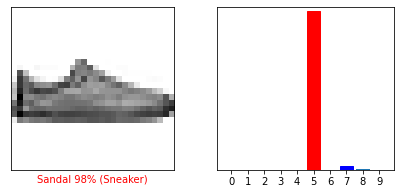

In [234]:
i = 12
plt.figure(figsize = (7,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_label(i, predictions[i], test_labels)
plt.show()

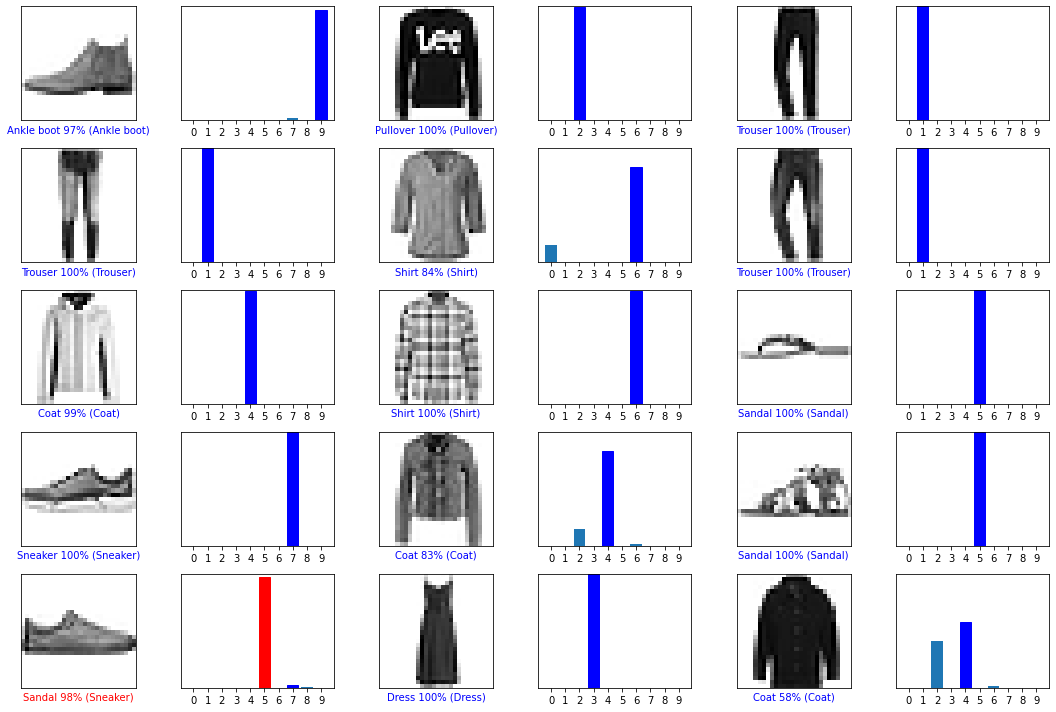

In [235]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(15,10))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_label(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


### Use the trained model
Finally, use the trained model to make a prediction about a single image.

tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [236]:
img = test_images[1]

In [237]:
img.shape

(28, 28)

In [238]:
img = (np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [240]:
prediction_single = probability_model.predict(img)

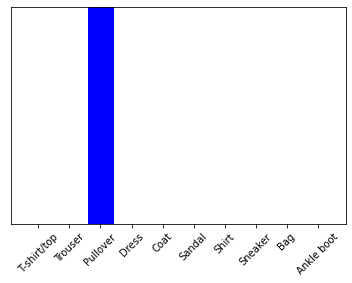

In [243]:
plot_label(1, prediction_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()
